In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv("train_titanic.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 数値データのみ
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


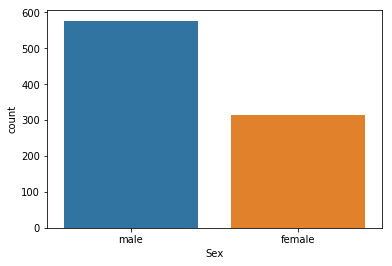

In [5]:
sns.countplot("Sex",data=train)

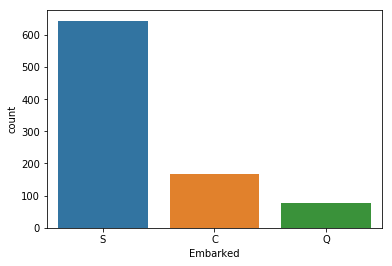

In [6]:
sns.countplot("Embarked", data=train)

In [7]:
def kesson_table(df):
    # 欠損値の合計
    null_val = df.isnull().sum()
    # 欠損値の比率
    percent = 100 * df.isnull().sum()/len(df)
    # DataFrame の作成
    kesson_table = pd.concat([null_val, percent], axis=1)
    kesson_table_ren_columns = kesson_table.rename(columns={0:"欠損数", 1:"%"})
    return kesson_table_ren_columns
kesson_table(train)

,欠損数,%
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [8]:
train["Age"] = train["Age"].fillna(train["Age"].median())
train["Embarked"] = train["Embarked"].fillna("S")
kesson_table(train)

,欠損数,%
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [9]:
train.loc[train["Sex"]=="male","Sex"] = 0
train.loc[train["Sex"]=="female","Sex"] = 1
train.loc[train["Embarked"]=="S", "Embarked"] = 0
train.loc[train["Embarked"]=="C", "Embarked"] = 1
train.loc[train["Embarked"]=="Q", "Embarked"] = 2
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


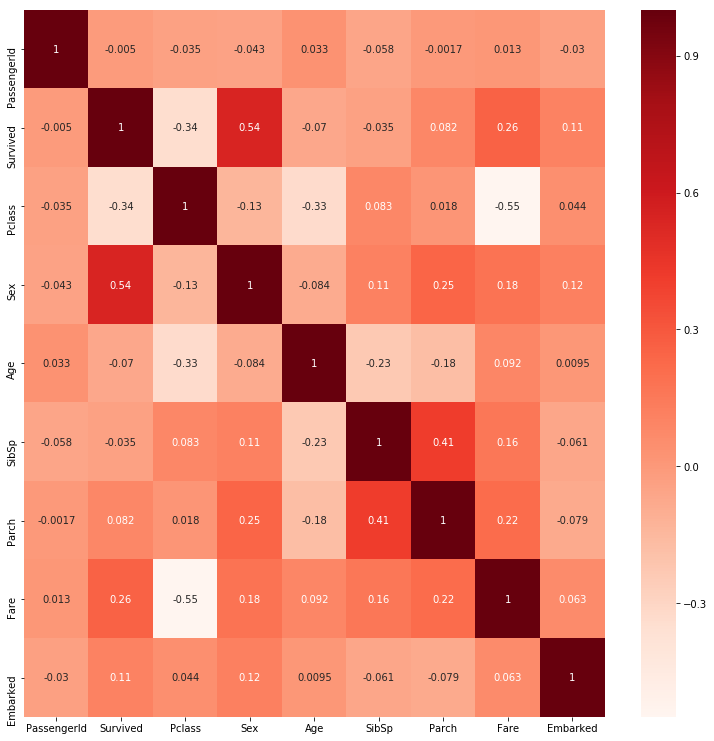

In [17]:
plt.rcParams["figure.figsize"] = (13.0, 13.0)
train_numeric = train.loc[:, ["PassengerId", "Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
# train_numeric.head(100)
feature_names = train_numeric.columns
correlation_matrix = np.corrcoef(train_numeric.values.astype(np.float).transpose())
sns.heatmap(correlation_matrix, annot=True,
            xticklabels=feature_names,
            yticklabels=feature_names,
            cmap="Reds")
plt.show()

In [13]:
import pandas as pd 
import numpy as np
from sklearn.ensemble import RandomForestClassifier 
train= pd.read_csv("train.csv").replace("male",0).replace("female",1).replace("S",0).replace("C",1).replace("Q",2)
test= pd.read_csv("test.csv").replace("male",0).replace("female",1).replace("S",0).replace("C",1).replace("Q",2) 
train["Age"].fillna(train.Age.mean(), inplace=True) 
train["Embarked"].fillna(train.Embarked.mean(), inplace=True) 
combine1 = [train]

for train in combine1: 
        train['Salutation'] = train.Name.str.extract(' ([A-Za-z]+).', expand=False) 
for train in combine1: 
        train['Salutation'] = train['Salutation'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
        train['Salutation'] = train['Salutation'].replace('Mlle', 'Miss')
        train['Salutation'] = train['Salutation'].replace('Ms', 'Miss')
        train['Salutation'] = train['Salutation'].replace('Mme', 'Mrs')
        del train['Name']
Salutation_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5} 

for train in combine1: 
        train['Salutation'] = train['Salutation'].map(Salutation_mapping) 
        train['Salutation'] = train['Salutation'].fillna(0) 
    
for train in combine1: 
        train['Ticket_Lett'] = train['Ticket'].apply(lambda x: str(x)[0])
        train['Ticket_Lett'] = train['Ticket_Lett'].apply(lambda x: str(x)) 
        train['Ticket_Lett'] = np.where((train['Ticket_Lett']).isin(['1', '2', '3', 'S', 'P', 'C', 'A']), train['Ticket_Lett'], np.where((train['Ticket_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']), '0','0')) 
        train['Ticket_Len'] = train['Ticket'].apply(lambda x: len(x)) 
        del train['Ticket'] 
train['Ticket_Lett']=train['Ticket_Lett'].replace("1",1).replace("2",2).replace("3",3).replace("0",0).replace("S",3).replace("P",0).replace("C",3).replace("A",3) 

    
for train in combine1: 
    train['Cabin_Lett'] = train['Cabin'].apply(lambda x: str(x)[0]) 
    train['Cabin_Lett'] = train['Cabin_Lett'].apply(lambda x: str(x)) 
    train['Cabin_Lett'] = np.where((train['Cabin_Lett']).isin([ 'F', 'E', 'D', 'C', 'B', 'A']),train['Cabin_Lett'], np.where((train['Cabin_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']), '0','0'))
del train['Cabin'] 
train['Cabin_Lett']=train['Cabin_Lett'].replace("A",1).replace("B",2).replace("C",1).replace("0",0).replace("D",2).replace("E",2).replace("F",1) 
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
for train in combine1:
    train['IsAlone'] = 0
    train.loc[train['FamilySize'] == 1, 'IsAlone'] = 1
train_data = train.values
xs = train_data[:, 2:] # Pclass以降の変数
y  = train_data[:, 1]  # 正解データ
test["Age"].fillna(train.Age.mean(), inplace=True)
test["Fare"].fillna(train.Fare.mean(), inplace=True)

combine = [test]
for test in combine:
    test['Salutation'] = test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
for test in combine:
    test['Salutation'] = test['Salutation'].replace(['Lady', 'Countess','Capt', 'Col',\
         'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    test['Salutation'] = test['Salutation'].replace('Mlle', 'Miss')
    test['Salutation'] = test['Salutation'].replace('Ms', 'Miss')
    test['Salutation'] = test['Salutation'].replace('Mme', 'Mrs')
    del test['Name']
Salutation_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for test in combine:
    test['Salutation'] = test['Salutation'].map(Salutation_mapping)
    test['Salutation'] = test['Salutation'].fillna(0)

for test in combine:
        test['Ticket_Lett'] = test['Ticket'].apply(lambda x: str(x)[0])
        test['Ticket_Lett'] = test['Ticket_Lett'].apply(lambda x: str(x))
        test['Ticket_Lett'] = np.where((test['Ticket_Lett']).isin(['1', '2', '3', 'S', 'P', 'C', 'A']), test['Ticket_Lett'],
                                   np.where((test['Ticket_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']),
                                            '0', '0'))
        test['Ticket_Len'] = test['Ticket'].apply(lambda x: len(x))
        del test['Ticket']
test['Ticket_Lett']=test['Ticket_Lett'].replace("1",1).replace("2",2).replace("3",3).replace("0",0).replace("S",3).replace("P",0).replace("C",3).replace("A",3) 

for test in combine:
        test['Cabin_Lett'] = test['Cabin'].apply(lambda x: str(x)[0])
        test['Cabin_Lett'] = test['Cabin_Lett'].apply(lambda x: str(x))
        test['Cabin_Lett'] = np.where((test['Cabin_Lett']).isin(['T', 'H', 'G', 'F', 'E', 'D', 'C', 'B', 'A']),test['Cabin_Lett'],
                                   np.where((test['Cabin_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']),
                                            '0','0'))        
        del test['Cabin']
test['Cabin_Lett']=test['Cabin_Lett'].replace("A",1).replace("B",2).replace("C",1).replace("0",0).replace("D",2).replace("E",2).replace("F",1).replace("G",1) 
test["FamilySize"] = train["SibSp"] + train["Parch"] + 1

for test in combine:
    test['IsAlone'] = 0
    test.loc[test['FamilySize'] == 1, 'IsAlone'] = 1
    
test_data = test.values
xs_test = test_data[:, 1:]
from sklearn.ensemble import RandomForestClassifier

random_forest=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=15,
            min_weight_fraction_leaf=0.0, n_estimators=51, n_jobs=4,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

random_forest.fit(xs, y)
Y_pred = random_forest.predict(xs_test)
"""random_forest.score(xs,y)
acc_random_forest = round(random_forest.score(xs,y) * 100, 2)
acc_random_forest
"""

import csv
with open("predict_result_data5.csv", "w") as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerow(["PassengerId", "Survived"])
    for pid, survived in zip(test_data[:,0].astype(int), Y_pred.astype(int)):
        writer.writerow([pid, survived])
